# **Sentiment Analysis of Stock Market Twitter Messages**

## **Table of Contents**
- Introduction
    - Sentiment Analysis Explained
    - What is Naive Bayes?
        - How does it Work?
        - Benefits and Drawbacks of Naive Bayes
- Importing Required Python Libraries
- An Overview of the Data
- Data Preparation
- Creating Training and Test Sets 
- Analyzing and Constructing a Vocabulary (Bag of Words)
    - Using Word Clouds to Gain Insights
        - Stop Words & Stemming
    - Constructing a Vocabulary
- Building the Classifier
    - Calculating Constants and Parameters
    - Building a Classification Function
- Testing the Classifier
- Results
- Conclusion


## **Introduction**
With this project, we will perform an exploratory analysis of the dataset and use it to train a predictive sentiment classification model that can be used to gauge whether the sentiment of twitter messages, as posted from the perspective of retail investors, is positive or negative. We will be building the classification model from scratch using Python and some of it's data science packages. The goals of this project are as follows:

 - To better understand the mathematical fundamentals of Naive Bayes Theorem and probability statistics
 - To work with structured and unstructured data
 - To utilize data cleaning/normalization techniques
 - To utilize various data visulization methods
 - To walk away with basic working knowledge of Sentiment Analysis as well as Natural Language Processing (NLP).

&nbsp;

#### **Sentiment Analysis Explained**
Sentiment Analysis, as the name suggests, analyzes textual data to find the tone of emotion conveyed within that text, this is known as the *sentiment*.


The process of training a computer to understand the context of human language is called Natural Language Processing(NLP). Sentiment Analysis is a sub-field of NLP. Us humans communicate with each other through language which is how we express ourselves. Things we say and write come with sentiments. With NLP, sentiments can be classified from text data. This analysis will differentiate between *postive* and *negative* sentiment, but just as we can express a variety of emotions, so can sentiments be widely categorized. 

In the context of stock investing and trading, sentiment analysis can be used on data derived from publicly available postings on social media sites like Twitter and Reddit to guage people's sentiment to the news in the stock market. As made evident in light of events that occured in 2021, where retail investors "short-squeezed" shares of AMC and GameStop, [[Wall Street Journal Article]](https://www.wsj.com/articles/gamestop-mania-reveals-power-shift-on-wall-streetand-the-pros-are-reeling-11611774663?reflink=desktopwebshare_permalink), trends that can be mined from social media should not be discounted. With sufficient data and proper application of machine learning, investors can make use of sentiment analysis to identify new opportunities (or risks) to guide their strategies.  
&nbsp;

#### **What is Naive Bayes?**
Naive Bayes is a type of classification algorithm that is used to calculate conditional probabilities. It leverages existing knowledge of known events to then calculate probabilies of other related events. Relative to other machine learning methods, Naive Bayes is simple, yet very suitable for many use-cases including sentiment analysis.

Like other supervised learning algorithms, naive bayes uses features to make predictions on target variables. Naive Bayes assumes that features are independent of each other and there is no correlation between features. However, this is hardly the case in real life scenarios. Regardless, the algorithm works surprisingly well. This naive assumption of features being uncorrelated is the reason why this algorithm is called “naive”. 

&nbsp;

##### **How Does it Work?**
In order to understand Naive Bayes, it is important to know about Bayes’ theorem. Bayes’ Theorem calculates the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically with the following equation:

<img src="formula.png" width=400 height=150>

This formula can seem overwhelming for anyone not familiar with the math notation, lets break it down:

- **P(A|B):** What we are solving for - the probability of event A, given the event B is true. Also known as the *posterior*.
- **P(B|A):** The probability of B being true given that A is true. Known as the *likelyhood*.
- **P(A):** The probability of event A being true. Known as the *prior*.
- **P(B):** The probability of event B being true. Known as the *evidence*.

So in other words,our posterior probability we are solving for can't be obtained directly. First we need to calculate *likelyhood* P(B|A), *prior* P(A) and *evidence* P(B). Only then, can the *posterior* P(A|B) be derived by dividing the product of *likelyhood* and *prior* by the *evidence*.

&nbsp;

##### **Benefits and Drawbacks of Naive Bayes**

Benefits:

- The assumption that all features are independent makes naive bayes algorithm very fast compared to other more complicated algorithms. In some cases, speed is preferred over higher accuracy.
- It works well with high-dimensional data such as text classification, email spam detection.

Drawbacks:

- The assumption that all features are independent is not usually the case in real life use-cases. This can make Naive Bayes less accurate than other more complicated algorithms.

## **Importing Required Python  Libraries**

First lets import the required libraries needed for this project:

In [88]:
# Pandas for data analysis
import pandas as pd

# Re for use of regular expressions
import re

# NLTK for stemming words, identifying stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

# Random for generating random numbers
from random import randint

# For: Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [89]:
# Set some plotting parameters for the Notebook
%matplotlib inline

## **An Overview of the Data**
For this project, I will be using a dataset consisting of twitter posts categorized by sentiment from the perspective of a retail investor. This dataset was made available online courtesy of Kaggle user *yash chaudhary* and can be obtained here [[Link]](https://www.kaggle.com/yash612/stockmarket-sentiment-dataset). 

Lets dive in and take a look.


In [90]:
# Import the dataset csv into a Pandas dataframe
data = pd.read_csv('stock_data.csv', dtype={'Sentiment':'int8'})

# Preview the first 10 records
data.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [91]:
# Review dataset metadata/information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int8  
dtypes: int8(1), object(1)
memory usage: 51.0+ KB


In [92]:
# Review unique values in "sentiment" column
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

As we can see, the dataset consists two columns: 

1. **text**: The Textual ("string") data obtained from Twitter
2. **sentiment**: The sentiment can be 1 (positive sentiment) or -1 (negative sentiment) according to the data dictionary on Kaggle. [[Link]](https://www.kaggle.com/yash612/stockmarket-sentiment-dataset). Our dataset contains 3,685 posts with positive sentiment and 2,106 posts with negative sentiment. 

Let's see what these sentiments look like in the context of this dataset.

In [93]:
# Random Positive Sentiment Sample
data[data['Sentiment'] == 1].iloc[12,0]

'Momentum is coming back to ETFC Broke MA200 resistance on solid volume Friday. ong set-up  '

In [94]:
# Random Negative Sentiment Sample
data[data['Sentiment'] == -1].iloc[12,0]

'AIG American International Group Option Traders bet on 4% down move by next Friday  '

As seen above, the positive sentiment post is indicating positive news on price action of a security whereas the negative sentiment post indicates negative news on price action of a security. By the end of this project, we should be able to classify sentiment on similar posts.

## **Data Preparation**
In reviewing the dataset, it is, for the most part, clean as it does not have any null (missing) values which will make this easier to work with. However, there are some other issues that need me addressed before beggining the analysis:

1. **Normalize the language:** 

    Normalize text in the text column to make it more suitable for NLP and Naive Bayes classification. We will remove all special punctuation using regular expressions and then convert the text strings to lowercase.
2. **Adjust Column Names:** 

    To make them easier to work with. As we will normalize all strings to lowercase, we will convert column names to uppercase to ensure uniqueness and not chance running into any indexing errors later on as we transform the dataset.

In [95]:
# Change column names to uppercase
data.columns= data.columns.str.upper()

# Create regex string assigned to variable, will use multiple times
regex_filt = '[^A-Za-z0-9 ]+' 

# Use regex string to replace non-alphanumeric chars (except spaces) 
# from TEXT column with empty space & convert string to lowercase
data['TEXT'] = data['TEXT'].str.replace(regex_filt, ' ', regex=True).str.lower()

# Results after cleaning
data.head(10)

,TEXT,SENTIMENT
0,kickers on my watchlist xide tit soq pnk cpw b...,1
1,user aap movie 55 return for the fea geed i...,1
2,user i d be afraid to short amzn they are lo...,1
3,mnta over 12 00,1
4,oi over 21 37,1
5,pgnx over 3 04,1
6,aap user if so then the current downtrend wi...,-1
7,monday s relative weakness nyx win tie tap ic...,-1
8,goog ower trend line channel test volume s...,1
9,aap will watch tomorrow for ong entry,1


So far so good. As seen above, the header is now uppercase and the data in TEXT column is normalized.

## **Creating Training and Test Sets**
Now that the TEXT column is cleaned, let's split the data into two distinct sets:
- **Training Set:** 80% of the posts will be used to train the model
- **Test Set:** The remaining 20% will be used to test the model upon completion. This will allow us to see how the classifier does when given "new" posts it hasnt seen before

Before creating training and test sets, the order of records in the dataset will be shuffled in random order ("randomized") to remove any potential bias in the structure of the dataset.  

In [96]:
# First, randomize the dataset
data_randomized = data.sample(frac=1, random_state=3)

# Calculate 80% index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split dataset on 80% index to create the two distinct sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(f'TRAINING SET: {training_set.shape[0]} Records')
print(f'TEST SET: {test_set.shape[0]} Records')

TRAINING SET: 4633 Records
TEST SET: 1158 Records


We now have the two distinct datasets. Of our 5,791 records, 4,633 posts will be analyzed to train the classification model. The remaining 1,158 will later be used to test the model's accuracy.

## **Analyzing and Constructing a Vocabulary (Bag of Words)**

We will now analyze and create the vocabulary, which in this context, means all the unique words found in the TEXT column of our training set. You can think of it like big bag of words. The order/structure of the words doesnt matter. We will be using it later on to calculate *frequency* of words which is what matters when we perform the probability calculations.

In [97]:
# Transforming each message from the TEXT column into a list split on spaces 
training_set['TEXT'] = training_set['TEXT'].str.split('\s+')

# How the dataframe looks now
training_set.head()

,TEXT,SENTIMENT
0,"[with, fcx, gapping, well, above, ideal, entry...",1
1,"[goog, has, potential, for, slightest, disappo...",-1
2,"[user, aap, user, take, some, of, that, left, ...",1
3,"[user, user, aap, daily, three, black, crows, ...",-1
4,"[opk, broke, out, from, its, sideways, consoli...",1


#### **Using Word Clouds to Gain Insights**
Word clouds are a great visualization tool when working with textual data. A word cloud is an image depicting a collection, or cluster, of words in various sizes. The bigger the word appears on the word cloud, the more often it is found within a given text and the more important it is. 

To better familiarize ourselves, and to evaluate frequency counts of words in this dataset as they relate to sentiment, we will use wordcloud visualizations and calculate frequency counts to see what we're working with. Let's start by filtering the data we need to inspect the vocabulary. We will create two list of words:
 - **Positive Vocabulary:** List of all the words found in texts with a positive sentiment
 - **Negative Vocabulary:** List of all the words found in texts with a negative sentiment

In [98]:
'''
Create two new dataframes to inspect the vocabulary 
One containing only negative sentiment texts and one for postive sentiment texts
'''
pos_sentiment_data = training_set[(training_set['SENTIMENT']==1)]
neg_sentiment_data = training_set[(training_set['SENTIMENT']==-1)]

'''
Generate a list of words for each. Words will be limited to those >1 character.
Will use this to create wordcloud visualizations
'''
pos_vocabulary = [word for each_row_list in pos_sentiment_data['TEXT'] 
                  for word in each_row_list if len(word) >1]

neg_vocabulary = [word for each_row_list in neg_sentiment_data['TEXT'] 
                  for word in each_row_list if len(word) >1]

Before proceeding to visualize these vocabularies, I will create some custom functions to more easily create the wordclouds later on as we will be making several visualizations. This will save me from repetively having to type in various parameters and it will ensure consistency in the word cloud visualizations.

In [99]:
# Adjust plotting parameters to make the visualizations bigger
plt.rcParams['figure.figsize'] = [10, 6]

def word_cloud_gen(sentiment):
    '''
    This function will take in a string argument of either "neg" or "pos"
    return: word cloud visualization of negative or positive dictionary data
    depending on provided argument.
    '''
    # nested functions to provide as parameter to wordcloud to change text color in wordclouds
    def colorize_pos(
        word=None, font_size=None, position=None,  orientation=None, 
        font_path=None, random_state=None):
        '''
        Return "Green" HSL color value for positive sentiment texts
        '''
        return "hsl(146, 100%, 30%)"

    def colorize_neg(
        word=None, font_size=None, position=None,  orientation=None, 
        font_path=None, random_state=None):
        '''
        Return: "Red" HSL color value for negative sentiment texts
        '''
        return "hsl(0, 100%, 30%)"
    
    # Generate word cloud visualization
    try:
        if sentiment == 'neg':
            text = ' '.join(neg_vocabulary) # Set vocabulary depending on argument
            title = 'Negative Sentiment Words' # Set visualization title
            color = colorize_neg # Set color function to use
        elif sentiment == 'pos':
            text = ' '.join(pos_vocabulary) # Set vocabulary depending on argument
            title = 'Positive Sentiment Words' # Set visualization title
            color = colorize_pos # Set color function to use
        word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
        word_cloud.recolor(color_func=color)
        plt.axis('off') # Remove axis
        plt.title(title, fontsize=20) # Add title
        plt.imshow(word_cloud)
    except Exception as e: # Fallback exception handler
        print(e)

**Word Cloud for Negative Sentiment Texts**

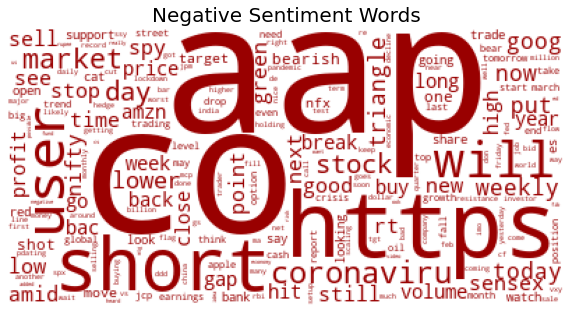

In [100]:
# Negative sentiment word cloud
word_cloud_gen('neg')

Text(0.5, 1.0, 'Popular Negative Sentiment Words')

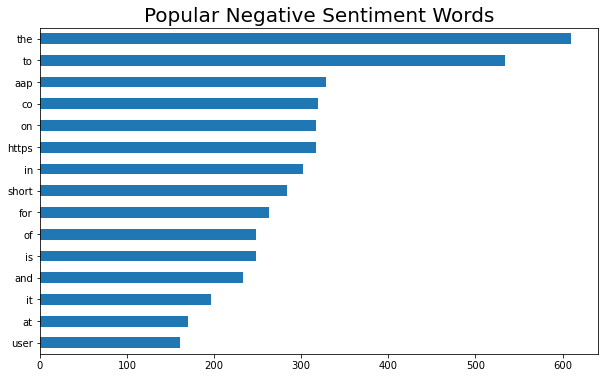

In [101]:
top_neg = pd.Series(
    neg_vocabulary).value_counts(ascending=False).head(15)

ax = top_neg.plot.barh()
ax.invert_yaxis()
plt.title('Popular Negative Sentiment Words', fontsize=20)
#plt.show()

**Word Cloud for Positive Sentiment Texts**

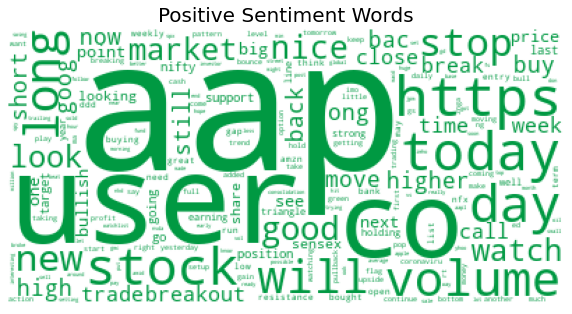

In [102]:
# Positive sentiment word cloud
word_cloud_gen('pos')

Text(0.5, 1.0, 'Popular Positive Sentiment Words')

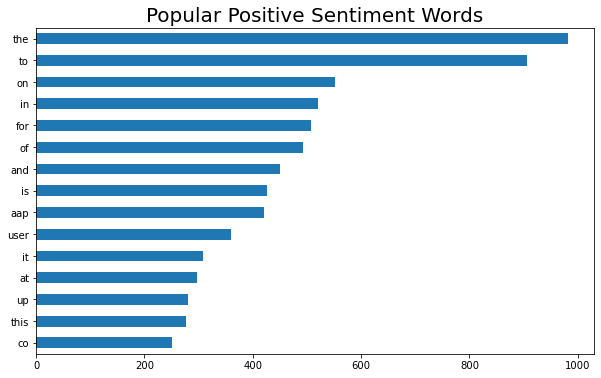

In [103]:
top_pos = pd.Series(
    pos_vocabulary).value_counts(ascending=False).head(15)

ax = top_pos.plot.barh()
ax.invert_yaxis()
plt.title('Popular Positive Sentiment Words', fontsize=20)
#plt.show()

This is not quite what I expected. The two word clouds look much alike! The terms "aap", "https", "co" and "user" are all over-represented in both positive and negative sentiment messages. There are also various common words displayed here such as "the", "to" and "of" etc... These are whats known as stopwords. They provide little if any value to the analysis. These stopwords are obfuscating our data making it difficult to glean any useful insights. 

##### **Stop Words & Stemming**

As just mentioned, stopwords are often used words which do not add much value to the analysis. We will remove these as well as the other over-represented words identified above.

We can further improve accuracy of text classifiers further by utilizing a technique called stemming. Stemming is the process of producing morphological variants of a root/base word. For example: "liked", "liking", and "likes" can all be stemmed to the base word "like". Grouping the words like this should reduce the size of our vocabulary further and increase speed and accuracy of sentiment analysis.

Rather than creating a custom list of stopwords, the NLTK Python library comes with lists of stopwords in the English languge. We will utilize it for this process.

In [104]:
'''
Create a filter of stop words to exclude from visualization.
We will remove the over-represented values indicated above as well as other
non-useful stop words with the help of the NLTK library
'''
sw_filt = ['aap','https', 'http','user', 'co'] + list(stopwords.words('english'))

# Apply stemming and remove stopwrods from the vocabularies
pos_vocabulary = [ps.stem(word) for word in pos_vocabulary if word not in sw_filt]
neg_vocabulary = [ps.stem(word) for word in neg_vocabulary if word not in sw_filt]

**Word Cloud for Negative Sentiment Texts (Cleaned)**

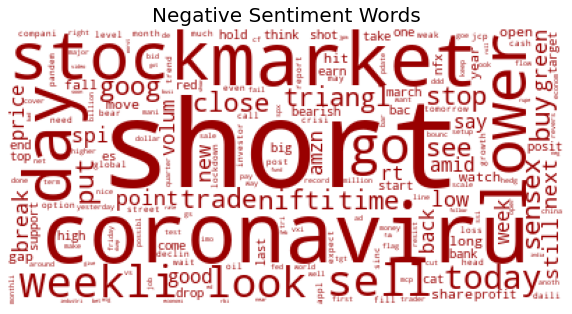

In [105]:
# Re-evaluate words in negative sentiment texts after stemming and removing stopwords
word_cloud_gen('neg')

Text(0.5, 1.0, 'Popular Negative Sentiment Words (Stopwords Removed)')

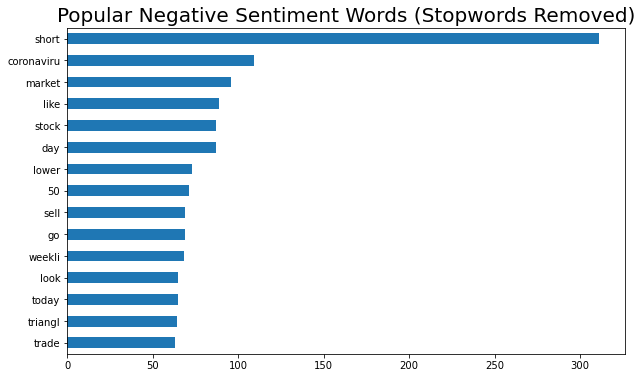

In [106]:
top_neg = pd.Series(
    neg_vocabulary).value_counts(ascending=False).head(15)

ax = top_neg.plot.barh()
ax.invert_yaxis()
plt.title('Popular Negative Sentiment Words (Stopwords Removed)', fontsize=20)
#plt.show()

The use of stemming and removing stopwords has made an appreciable difference in clarity.

For the top 15 words of negative sentiment texts, the word "short" is  a clear outlier and the most frequent word by far. In investing terminology, the term "short" relates to speculation on the decline in a stocks price [[link]](https://www.investopedia.com/terms/s/shortselling.asp). It makes sense that it bears association to negative sentiment. It is followed by the word "coronavirus" which also makes sense given the effects the pandemic has had on global equity markets at the time this data was collected.

**Word Cloud for Positive Sentiment Texts (Cleaned)**

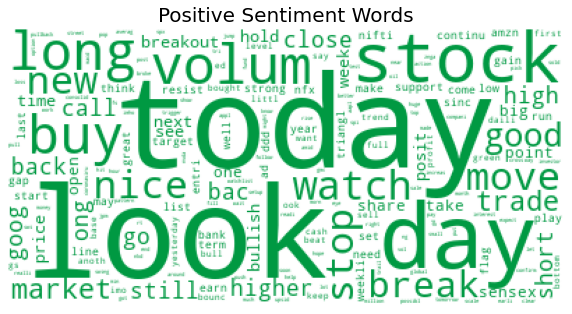

In [107]:
# Re-evaluate words in positive sentiment texts after stemming and removing stopwords
word_cloud_gen('pos')

Text(0.5, 1.0, 'Popular Positive Sentiment Words (Stopwords Removed)')

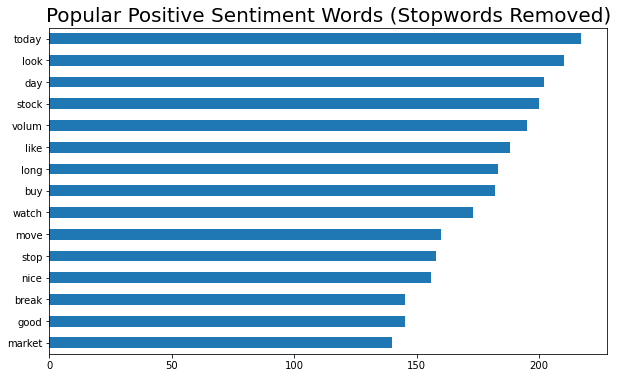

In [108]:
top_pos = pd.Series(
    pos_vocabulary).value_counts(ascending=False).head(15)

ax = top_pos.plot.barh()
ax.invert_yaxis()
plt.title('Popular Positive Sentiment Words (Stopwords Removed)', fontsize=20)
#plt.show()

For the top 15 words of positive sentiment texts, there is a more even distribution of words with "today" appearing the most.

This analysis of the word counts goes to show that the frequency of words in the vocabulary for each sentiment type will be important when calculating the conditional probabilities for the classifier. The presence of some terms within a given text will have an impact on the probability of a text belonging to one sentiment or another which will affect the sentiment prediction. 

#### **Constructing the Vocabulary**
Now that we have inspected the words frequencies and how they relate to sentiment, we will move on with constructing a master "vocabulary" (bag of words) to use in the classifier - regardless of sentiment type.

In [109]:
'''
Create a vocabulary (bag of words) iterable consisting of *all*  words 
in our training set
'''
# Initialize the list
vocabulary = [] 
# iterate over records 
for index, text in enumerate(training_set['TEXT']):
    # Iterate over each value in record (recall this consists list of strings/words)
    for word in text:
        # Apply stemming to each word
        stemmed_word = ps.stem(word)
        # Append to dictionary if word is >1 char and is not a stop-word
        if stemmed_word != '' and len(word) > 1 and stemmed_word not in sw_filt:
            vocabulary.append(stemmed_word)

In [110]:
len(vocabulary)

43744

So far our vocabulary has 43,744 words. We mostly need to concern ourselves with often recurring words in order to build associations with sentiment type to help with the classification later. Let's evaluate the dictionary to see if there are any words with very low frequency counts. 

We can use a histogram to visulaize the distribution of frequency counts. First we import the vocabulary to a DataFrame to more easily calculate the frequency counts and plot the histogram. 

In [111]:
# Create a Series of frequency counts for each word in the vocabulary
s = pd.Series(vocabulary).value_counts()
# Create a DataFrame using above Series
freq_df = pd.DataFrame({'WORD': s.index, 'WORD_FREQUENCY': s.values})

In [112]:
# Preview
freq_df.head(10)

,WORD,WORD_FREQUENCY
0,short,420
1,thi,415
2,day,289
3,stock,287
4,today,282
5,like,277
6,look,275
7,buy,238
8,volum,237
9,market,236


Text(0.5, 1.0, 'Word Count Frequency Distribution: All')

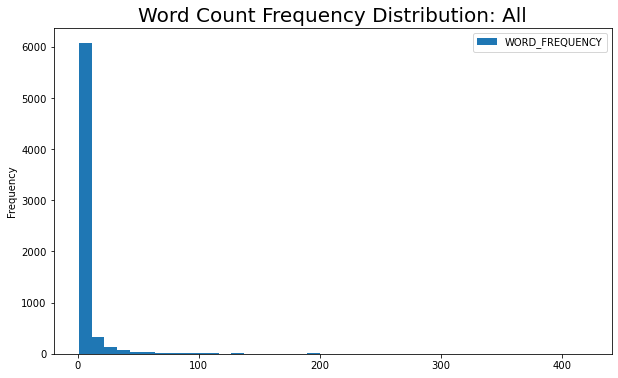

In [113]:
# Plot the freq_df into a histogram
freq_df.plot.hist(bins=40)
plt.title('Word Count Frequency Distribution: All', fontsize = 20)

Looking at above histogram, which shows the dataset frequency count distribution as a whole, we can clearly see that the majority of frequency counts are on the far lower end of the scale. Lets take a closer look at those words with frequency counts less than 10: 

Text(0.5, 1.0, 'Word Count Frequency Distribution: 1-9')

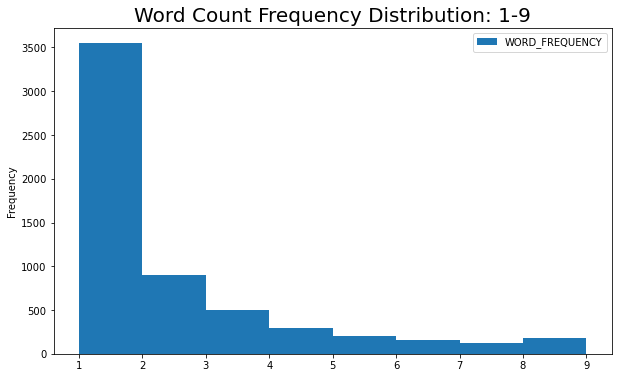

In [114]:
# Filter freq_df into those with a count of less than 10 and plot into a histogram
freq_df[freq_df['WORD_FREQUENCY'] < 10].plot.hist(bins=8)
plt.title('Word Count Frequency Distribution: 1-9', fontsize = 20)

Looking closer at the frequency count distribution, there are alot of words that only show up only once or twice. Lets remove these from the vocabulary. These are unlikely to be statistically significant for the purpose of the classifier. This "threshold" was chosen through testing as it proved to be the least distruptive to the overall accuracy.

In [115]:
# desired frequency count threshold
freq_threshhold = 2

# Update vocabulary list to only include words above set threshold frequency count
vocabulary = set(freq_df[freq_df['WORD_FREQUENCY'] > freq_threshhold]['WORD'].tolist())

# Update stopword list (sw_filt) with words that dont meet threshold
sw_filt = sw_filt + list(set(freq_df[freq_df['WORD_FREQUENCY'] <= freq_threshhold]['WORD'].tolist()))

In [116]:
len(vocabulary)

2348

Our vocabulry is now only 2,348 words.

We're now going to use this vocabulary we just created to make the data transformations we want.

In [117]:
'''
Create a dictionary, where each key is a unique word from the vocabulary, 
each value is a list of the length of training set, where each element in the list is a 0.
'''
# Initialize a frequency dict with 0 values for each word in vocab
word_count_dict = {unique_word: [0] * len(training_set['TEXT']) for unique_word in vocabulary}
#not_found = []
for index, text in enumerate(training_set['TEXT']):    
    for word in text:
        word = ps.stem(word)
        try:
            if word in word_count_dict:
                word_count_dict[word][index] += 1
            #elif word in sw_filt or len(word) ==1 or word =='':
            #    pass
            #else:
            #    not_found.append(word)
        except Exception as e:
            print(e)
            pass
        
word_count_df = pd.DataFrame(word_count_dict)
#print(f'Words not found: {len(list(set(not_found)))}')

In [118]:
word_count_df.head()

,make,respons,ht,ax,dime,tivo,privat,hp,qco,bil,...,bare,vs,heo,insight,halt,dov,expir,said,junk,blow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
'''
Combine the dataframe we just built above with the dataframe containing the training set. 
This data will be used to analyze probabilities.
'''
training_set_clean = pd.concat([training_set, word_count_df], axis=1)
training_set_clean.head()

,TEXT,SENTIMENT,make,respons,ht,ax,dime,tivo,privat,hp,...,bare,vs,heo,insight,halt,dov,expir,said,junk,blow
0,"[with, fcx, gapping, well, above, ideal, entry...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[goog, has, potential, for, slightest, disappo...",-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[user, aap, user, take, some, of, that, left, ...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[user, user, aap, daily, three, black, crows, ...",-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[opk, broke, out, from, its, sideways, consoli...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
training_set_clean.to_csv('training_set_cleaned.csv')

## **Building the Classifier**
We're now done with cleaning and transforming the training set data and we can begin creating the classifier. We will use Naive Bayes to answer these two probability questions to be able to classify new messages:

- Probability of Each sentiment type given a word for each word in message
 
Mathematical notation per sentiment type is as follows:

<img src="f1a.jpg" width=500 height=150>
 
It will take the product of these individual probabilites for each sentiment type and the sentiment type with the highest probability value is the most liley to be accurate.

To calculate the above, first we need to calculate P(sentiment) and P(word|sentiment)for each sentiment type among the other below constants using the training set:

- Overall probability of each sentiment type
- Count of all words in vocabulary
- Count of words in each sentiment type

Also, use Laplace smoothing variable and set to 1

Once we have the constants above, we can move on with calculating the parameters P(word|sentiment) for each of the sentiment types. Each parameter will be a conditional probability value associated with each word in the vocabulary. These parameters can then be used to answer our first two questions above.

Mathematical notation per sentiment type is as follows:

<img src="f1b.jpg" width=400 height=150>

#### **Calculating Constants and Parameters**

In [121]:
# n_vocabulary: The number of words in the vocabulary
n_vocabulary = len(list(vocabulary))

# Initialize variable for Laplace smoothing
alpha = 1

error_count = 0

# Holding Dict
param_sent = {}
p_sent_dict = {} # Will contain probability of each sentiment type (constant)

# List of our sentiment types
sentiment_types = data['SENTIMENT'].unique()

# Iterate through each sentiment type in list
for sent_classif in sentiment_types:
    print(f'\nSetting parameters for {sent_classif} sentiment...')
    param_sent[sent_classif] = {unique_word:0 for unique_word in vocabulary}
    
    # Filter data by sentiment type
    sentiment_subset = training_set_clean[training_set_clean['SENTIMENT'] == sent_classif]
    
    # Calculate the probablity of sentiment
    p_sent = len(sentiment_subset) / len(training_set_clean)
    print(f'Sentiment {sent_classif} probability is {str(p_sent)}')
    p_sent_dict[sent_classif] = p_sent # Add calculation to p_sent dict

    # Calculate the number of words in sentiment
    num_words_in_sent = sentiment_subset['TEXT'].apply(len)
    n_sent = num_words_in_sent.sum()
    print(f'The number of words in {sent_classif} is: {str(n_sent)}')

    # Use constants to now calculate parameters
    for word in vocabulary:
        try:
            n_word_given_sent = sentiment_subset[word].sum()
            p_word_given_sent = (n_word_given_sent + alpha) / (n_sent + alpha * n_vocabulary)
            param_sent[sent_classif][word] = p_word_given_sent
        except Exception as e:
            print(e)
            error_count +=1
            pass

print(f'Done. There were {error_count} exceptions handled.')


Setting parameters for 1 sentiment...
Sentiment 1 probability is 0.6436434275847184
The number of words in 1 is: 45518

Setting parameters for -1 sentiment...
Sentiment -1 probability is 0.3563565724152817
The number of words in -1 is: 25587
Done. There were 0 exceptions handled.


#### **Building a Classification Function**

In [122]:
def classify(some_text):
    '''
    This function will take in a string as an argument "some_text"
    and apply Naive Bayes Algorithm to predict the sentiment of the string.
    return: predicted sentiment "1" (Positive Sentiment) or "-1" (Negative Sentiment)
    '''
    try:
        # Normalize the text provided in the arg
        some_text = re.sub(regex_filt, ' ', some_text).lower() # Remove all punctuation
        some_text = re.split('\s+', some_text) # Split on spaces
        # Apply word stemming to the text
        some_text = list(set([ps.stem(word) for word in some_text if word not in sw_filt]))
        # initiate a probability dict. This dict will hold calculated probabilities. 
        # Dict keys will be each of our classifications types (-1 and 1). 
        # Dict values will be the probability score as they are calculated. 
        # The classification (key) with highest overall probability (value) will then be 
        # returned as the most probable.
        p_list = {} 
        # Iterate through possible classifications (only 2 this time: -1 and 1)
        for sentiment in sentiment_types:
            # Find probability of each sentiment (-1 or 1)
            # Use dictionary created in parameters section earlier to initiate the
            # "probability score".
            p_sentiment_given_text = p_sent_dict[sentiment]
            # Now iterate through each word of the argument string
            for word in some_text: 
                # if the word is found in param_sent dict
                if word in param_sent[sentiment]: 
                    # Find the probability of that word given the sentiment
                    # And multiply it to p_sentiment_given_text var, update var
                    p_sentiment_given_text *= param_sent[sentiment][word] 
            # Now that probabilities for all word in arg are calculated and accounted 
            # for in probability score, record finalized value to p_list dict
            p_list[sentiment] = p_sentiment_given_text
            # Return dict key (classification type) with higher probability.
            prediction = max(p_list.keys(), key=(lambda k: p_list[k]))
    except:
        # Error Handling
        prediction = None
    return prediction

## **Testing the Classifier**
We will now apply the function we just built to the enirety of the test set that was creating earlier. Recall that this training set consists of 20% of the headlines in our dataset and was not used to build the model. In order to easily compare predicted sentiments to the actual recorded sentiments, we will insert a new column into our test set labelled *prediction*

In [123]:
'''
Apply the function to the "headline" column in the datset 
and record predicted sentiment to new "predicted" column:
'''
test_set['PREDICTION'] = test_set['TEXT'].apply(classify).astype('int8')

# Preview the df
test_set.head()

,TEXT,SENTIMENT,PREDICTION
0,user i agree goog is severly overbought in th...,-1,-1
1,ec looks poised to breakout these next few day...,1,1
2,with little whips on pops and drops don t go a...,1,1
3,es f bernanke sees spring slump will he blame...,-1,-1
4,we have a joke abt how often it seems jef is w...,1,1


## **Results**

In [124]:
test_set['STATUS'] = (test_set['SENTIMENT'] == test_set['PREDICTION']).astype('category')
res_counts = test_set['STATUS'].value_counts().tolist()
correct = res_counts[0]
incorrect = res_counts[1]
total = test_set.shape[0]
print(f'Correct Preditions: {correct}')
print(f'Incorrect Preditions: {incorrect}')
print('-'*30)
print(f'Accuracy Rate: {str(round((correct/total)*100,2))}%')

Correct Preditions: 904
Incorrect Preditions: 254
------------------------------
Accuracy Rate: 78.07%


In [125]:
test_set.head(10)

,TEXT,SENTIMENT,PREDICTION,STATUS
0,user i agree goog is severly overbought in th...,-1,-1,True
1,ec looks poised to breakout these next few day...,1,1,True
2,with little whips on pops and drops don t go a...,1,1,True
3,es f bernanke sees spring slump will he blame...,-1,-1,True
4,we have a joke abt how often it seems jef is w...,1,1,True
5,cat green to red soon,-1,-1,True
6,qco close to 30 33,1,1,True
7,acm trying to be a playa,1,1,True
8,while the first quarter was horrible for almos...,1,-1,False
9,aap enjoying some really nice gains right now ...,-1,1,False


Text(0.5, 1.0, 'Test Set Classification Results')

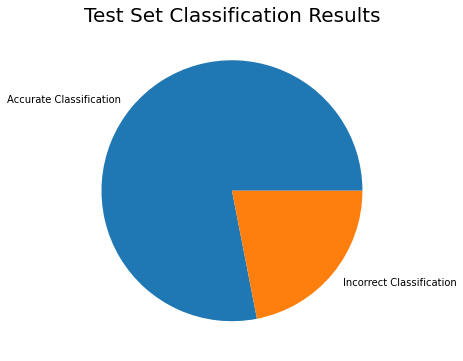

In [126]:
pd.Series([correct,incorrect],index =['Accurate Classification', 'Incorrect Classification']).plot.pie()
plt.axis('off') # Remove axis
plt.title('Test Set Classification Results', fontsize=20)

## **Conclusion**
With an accuracy rate approaching 80%, The classifier is better than chance at determining sentiment of a message, but further improvement is necessary.

Some next steps to consider to better improve accuracy would be to do additional research into additional text normaliztion/NLP techniques and consider use of more advanced algorithms using a machine-learning library like scikit learn to get more accurate results.

## **Helpful Links**

https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

https://datalab.ucdavis.edu/text-and-nlp/